In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression, chi2, mutual_info_regression, RFECV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor

In [2]:
random_state = 13

In [3]:
x_train = pd.read_csv('x_train_high_correlation_removed.csv')
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('x_test.csv')
x_sample = pd.read_csv('x_train_sample.csv')

In [4]:
y_train_array = y_train.astype(float).to_numpy()
y_train_array_flat = []
for sublist in y_train_array:
    for crime_rate in sublist:
        y_train_array_flat.append(crime_rate)

In [5]:
def get_scores(x_best, algo_name):
    importances = pd.Series(x_best.scores_, index = x_train.columns)
    importances = importances.nlargest(k).sort_values(ascending = True )
    plt.figure(figsize=(10,10))
    importances.plot(kind = 'barh')
    print('\n Top',k,'features selected by',algo_name,'algorithm:')
    plt.show()

In [6]:
# calculate the x best features based on different feature selection criteria
# x set to 25 for initial analysis
k = 25
np.random.seed(random_state)
x_best_f_regression = SelectKBest(f_regression, k = k).fit(x_train, y_train_array_flat)
np.random.seed(random_state)
x_best_chi2 = SelectKBest(chi2, k = k).fit(x_train, y_train_array_flat)
np.random.seed(random_state)
x_best_mutual = SelectKBest(mutual_info_regression, k = k).fit(x_train, y_train_array_flat)


 Top 25 features selected by f-regression algorithm:


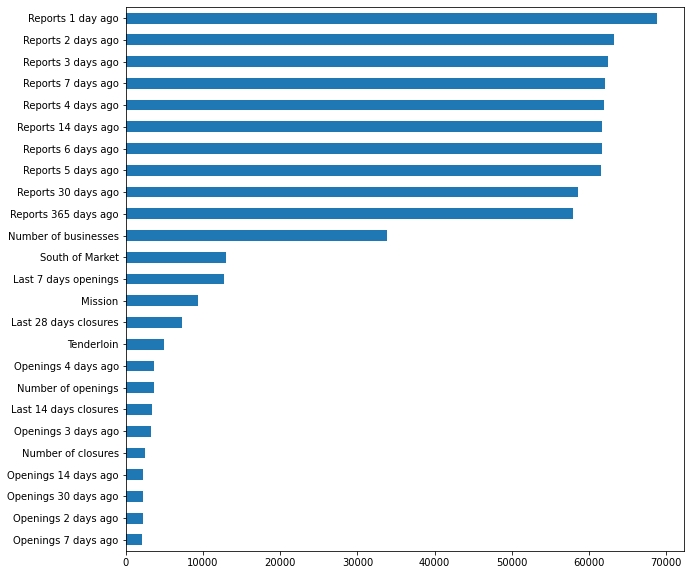

In [7]:
get_scores(x_best_f_regression, 'f-regression')


 Top 25 features selected by chi2 algorithm:


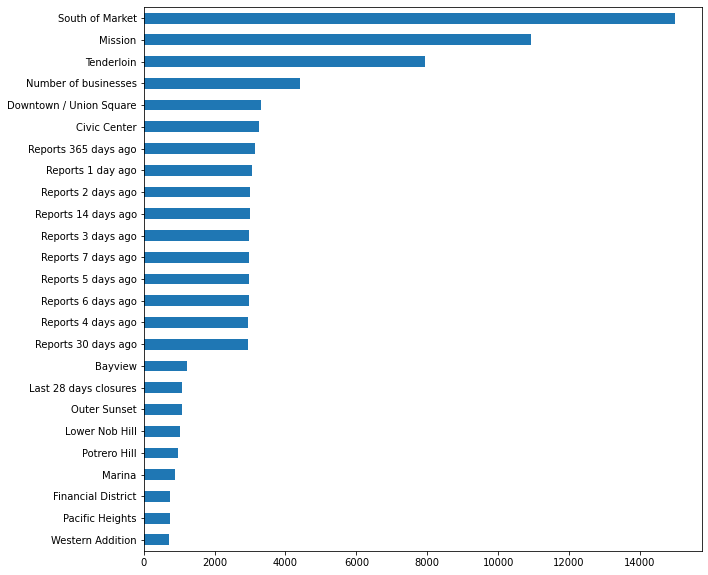

In [8]:
get_scores(x_best_chi2, 'chi2')


 Top 25 features selected by mutual info regression algorithm:


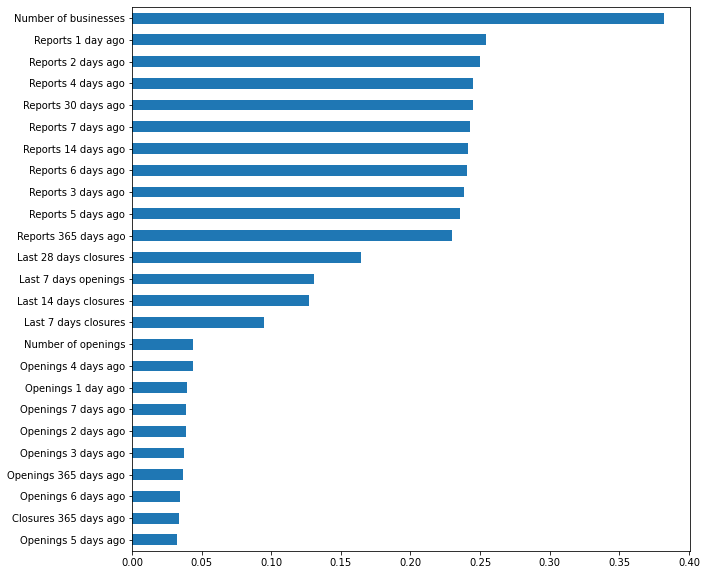

In [9]:
get_scores(x_best_mutual, 'mutual info regression')

In [10]:
#calculate feature importance using extra trees classifier
tree_model_regressor = ExtraTreesRegressor(random_state = 13)
tree_model_regressor.fit(x_train, y_train_array_flat)

ExtraTreesRegressor(random_state=13)

In [11]:
def plot_extra_trees():
    importances = pd.Series(tree_model_regressor.feature_importances_, index = x_train.columns)
    importances = importances.nlargest(k).sort_values(ascending = True )
    plt.figure(figsize=(10,10))
    importances.plot(kind = 'barh')
    print('\n Top',k,'features selected by extra trees algorithm:')
    plt.show()


 Top 25 features selected by extra trees algorithm:


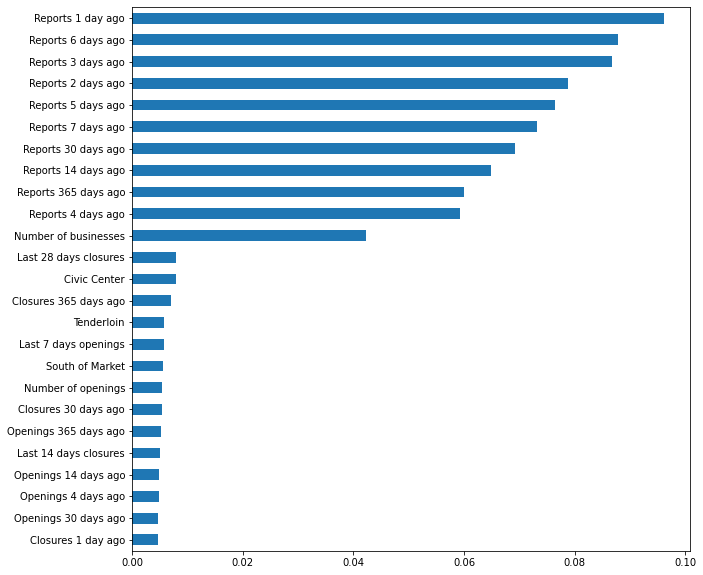

In [12]:
plot_extra_trees()

In [13]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', random_state=13, n_jobs=1)
forest.fit(x_train, y_train_array_flat)

RandomForestRegressor(n_estimators=500, n_jobs=1, random_state=13)

In [14]:
def plot_random_forest():
    importances = pd.Series(forest.feature_importances_, index = x_train.columns)
    importances = importances.nlargest(k).sort_values(ascending = True )
    plt.figure(figsize=(10,10))
    importances.plot(kind = 'barh')
    print('\n Top',k,'features selected by random forest algorithm:')
    plt.show()


 Top 25 features selected by random forest algorithm:


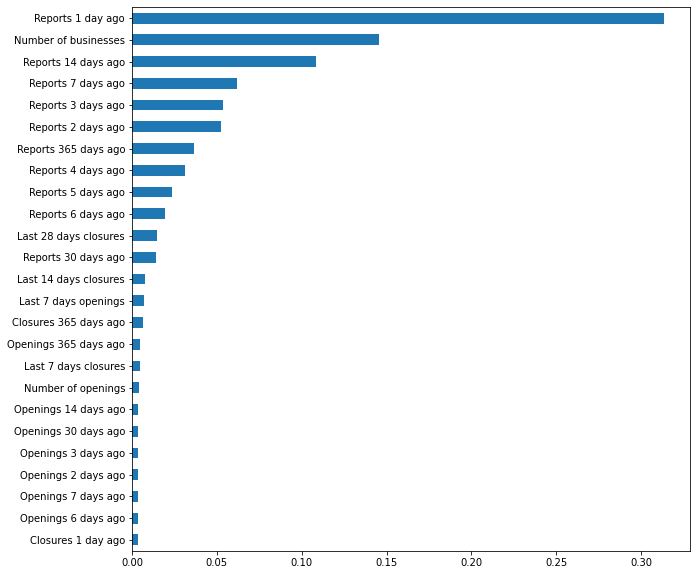

In [15]:
plot_random_forest()

In [16]:
adaBoost = AdaBoostRegressor(
        DecisionTreeRegressor(),
                              n_estimators=500,
                              random_state=13)
adaBoost.fit(x_train, y_train_array_flat)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=500,
                  random_state=13)

In [17]:
def plot_ada_boost():
    importances = pd.Series(adaBoost.feature_importances_, index = x_train.columns)
    importances = importances.nlargest(k).sort_values(ascending = True )
    plt.figure(figsize=(10,10))
    importances.plot(kind = 'barh')
    print('\n Top',k,'features selected by ada boost algorithm:')
    plt.show()


 Top 25 features selected by ada boost algorithm:


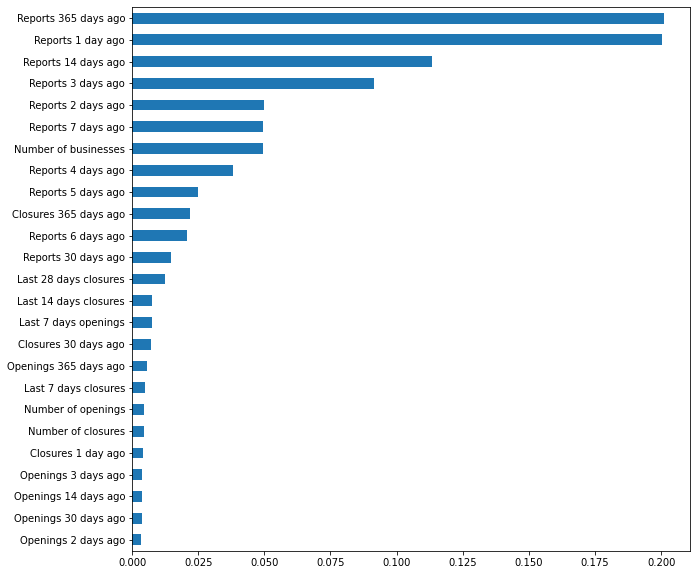

In [18]:
plot_ada_boost()

In [19]:
# From these methods of feature selection it is clear that some features should definitely be used
# But others vary.  A csv of the top 10 of each feature selection algorithm will be created for use
# with prediction algorithms going forward.

In [20]:
# calculate the x best features based on different feature selection criteria
# x set to select best 10 features, per each method
k = 10
np.random.seed(random_state)
x_best_f_regression = SelectKBest(f_regression, k = k).fit(x_train, y_train_array_flat)
np.random.seed(random_state)
x_best_chi2 = SelectKBest(chi2, k = k).fit(x_train, y_train_array_flat)
np.random.seed(random_state)
x_best_mutual = SelectKBest(mutual_info_regression, k = k).fit(x_train, y_train_array_flat)


 Top 10 features selected by f-regression algorithm:


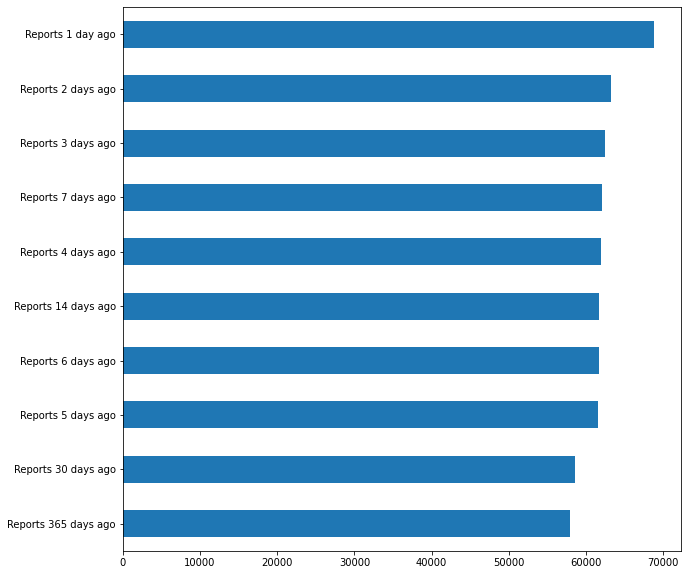

In [21]:
get_scores(x_best_f_regression, 'f-regression')


 Top 10 features selected by chi2 algorithm:


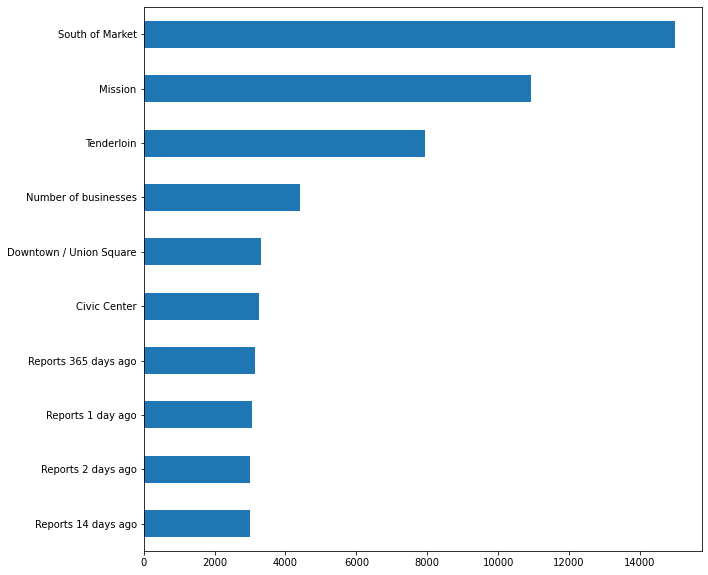

In [22]:
get_scores(x_best_chi2, 'chi2')


 Top 10 features selected by mutual info algorithm:


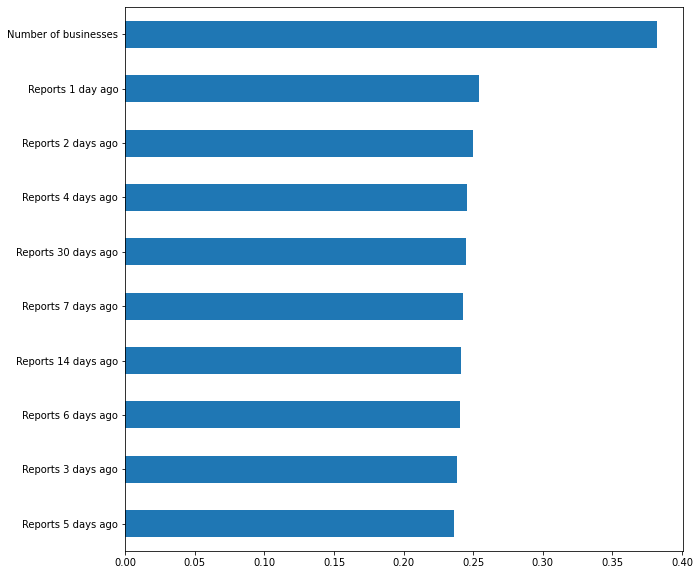

In [23]:
get_scores(x_best_mutual, 'mutual info')


 Top 10 features selected by extra trees algorithm:


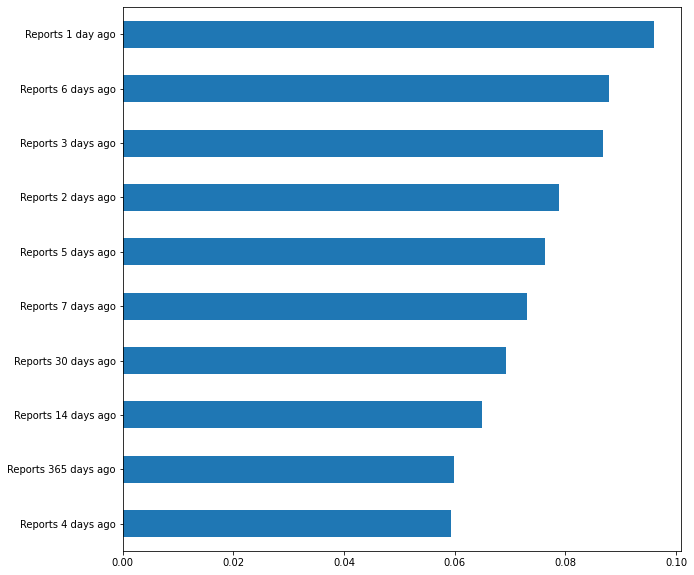

In [24]:
plot_extra_trees()


 Top 10 features selected by random forest algorithm:


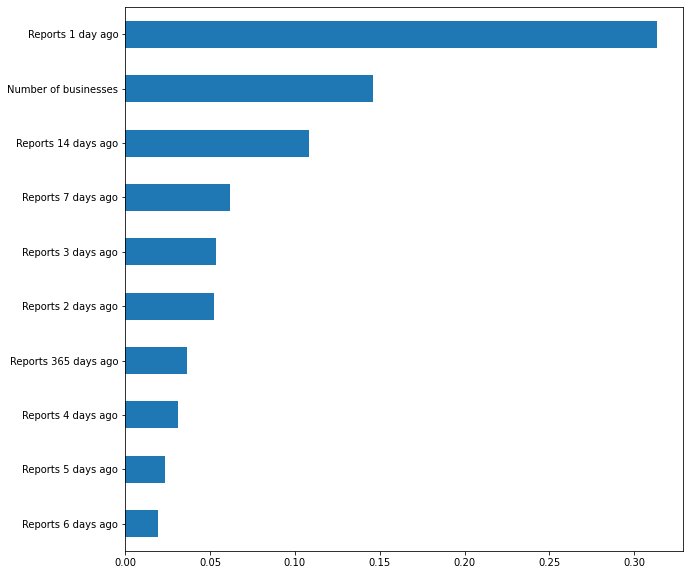

In [25]:
plot_random_forest()


 Top 10 features selected by ada boost algorithm:


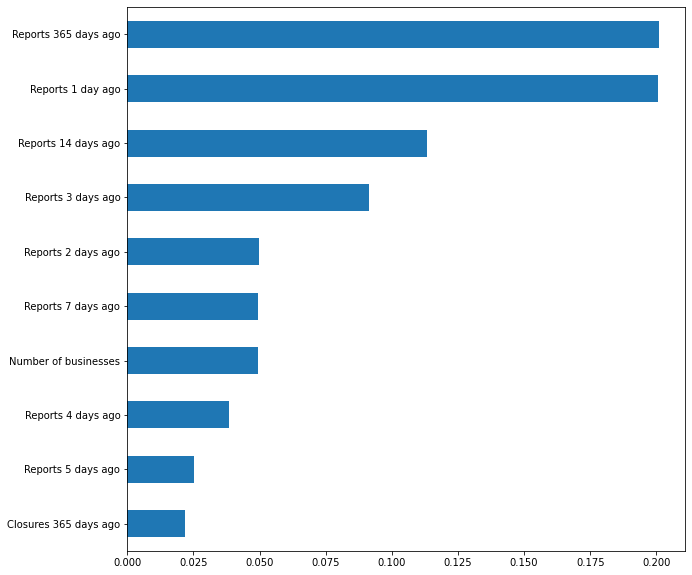

In [26]:
plot_ada_boost()

In [27]:
#Although each algorithm produces different levels of importance, mutual info, extra_trees, random_forest, adaboost
#and f-regression all select a very similar top 10.  Feature sets therefore only created once based on 
#f-regression (all incident data), chi2 (most varied selection) and adaboost (most different to f-regression).

In [28]:
#UPDATE: Initial Model training phase has revealed that the datasets are too large to brute force search for optimal 
#hyperparameters in the given timeframe.  As such, 10% datasamples of each dataset will be created for initial 
#hyperparameter searching, to obtain a feel for the right values.  The full training dataset will still be used for 
#final hyperparameter tuning however there is insufficient time and resources to use it in the initial stage.

In [29]:
top_10_f_regression = ['Reports 1 day ago', 'Reports 2 days ago', 'Reports 3 days ago',
                       'Reports 4 days ago', 'Reports 5 days ago', 'Reports 6 days ago',
                      'Reports 7 days ago','Reports 14 days ago','Reports 30 days ago','Reports 365 days ago']
x_train_selected = x_train[top_10_f_regression]
x_train_selected.to_csv('x_train_f_regression.csv', index = False)
x_test_selected = x_test[top_10_f_regression]
x_test_selected.to_csv('x_test_f_regression.csv', index = False)
x_sample_selected = x_sample[top_10_f_regression]
x_sample_selected.to_csv('x_train_f_regression_sample.csv', index = False)

PermissionError: [Errno 13] Permission denied: 'x_train_f_regression_sample.csv'

In [ ]:
top_10_chi2 = ['South of Market', 'Mission', 'Tenderloin', 'Number of businesses', 
               'Downtown / Union Square', 'Civic Center', 'Reports 365 days ago',
               'Reports 1 day ago','Reports 2 days ago','Reports 14 days ago']
x_train_selected = x_train[top_10_chi2]
x_train_selected.to_csv('x_train_chi2.csv', index = False)
x_test_selected = x_test[top_10_chi2]
x_test_selected.to_csv('x_test_chi2.csv', index = False)
x_sample_selected = x_sample[top_10_chi2]
x_sample_selected.to_csv('x_train_chi2_sample.csv', index = False)

In [ ]:
top_10_ada = ['Reports 365 days ago', 'Reports 1 day ago', 'Reports 14 days ago', 'Reports 3 days ago', 
               'Reports 2 days ago', 'Reports 7 days ago', 'Number of businesses',
               'Reports 4 days ago','Reports 5 days ago','Closures 365 days ago']
x_train_selected = x_train[top_10_ada]
x_train_selected.to_csv('x_train_adaboost.csv', index = False)
x_test_selected = x_test[top_10_ada]
x_test_selected.to_csv('x_test_adaboost.csv', index = False)
x_sample_selected = x_sample[top_10_ada]
x_sample_selected.to_csv('x_train_adaboost_sample.csv', index = False)

In [ ]:
# It is noted that there are not many business related variables selected by some algorithms.
# This suggests there is possibly little potential in using them to make predictions, however
# without directly attempting it is not a certainty.  As such, two additional feature selected
# datasets will be created.  Of the ten features in each, one will contain 50% business features
# and the other 100% business features.  Since mutual info ranked a business variable
# top, the results of this algorithm will be used to inform the manual construction of these datasets.

In [ ]:
top_5_business_features = ['Number of businesses', 'Last 28 days closures', 'Last 7 days openings',
                          'Last 14 days closures', 'Last 7 days closures']
top_5_crime_features = ['Reports 1 day ago', 'Reports 2 days ago', 'Reports 4 days ago', 
                        'Reports 30 days ago', 'Reports 7 days ago']
top_10 = np.concatenate((top_5_business_features,top_5_crime_features))
x_train_selected = x_train[top_10]
x_train_selected.to_csv('x_train_equal_crime_and_business.csv', index = False)
x_test_selected = x_test[top_10]
x_test_selected.to_csv('x_test_equal_crime_and_business.csv', index = False)
x_sample_selected = x_sample[top_10]
x_sample_selected.to_csv('x_train_equal_crime_and_business_sample.csv', index = False)

In [ ]:
additional_5_business_features = ['Number of openings','Openings 4 days ago','Openings 1 day ago', 
                                  'Openings 7 days ago', 'Openings 2 days ago']
top_10 = np.concatenate((top_5_business_features,additional_5_business_features))
x_train_selected = x_train[top_10]
x_train_selected.to_csv('x_train_all_business.csv', index = False)
x_test_selected = x_test[top_10]
x_test_selected.to_csv('x_test_all_business.csv', index = False)
x_sample_selected = x_sample[top_10]
x_sample_selected.to_csv('x_train_all_business_sample.csv', index = False)

In [ ]:
sel_methods = np.array(['_f_regression','_chi2','_adaboost','_equal_crime_and_business','_all_business'])

In [ ]:
file = open("Selection Methods","wb")

In [ ]:
np.save(file,sel_methods)

In [ ]:
file.close